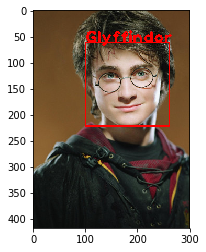

In [19]:
%matplotlib inline

from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = load_model('models/sorting_deep_hat.h5')

image = cv2.imread('data/sample/harrypotter.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

for (x, y, w, h) in faces:
    face_image = image[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (100, 100))
    
    b,g,r = cv2.split(image)
    i = cv2.merge([r,g,b])
    i = cv2.resize(i,(100, 100))
    i = np.array([i / 255.])
    
    house = np.argmax(model.predict(i))
    if house == 0:
        house_name = 'Glyffindor'
        color = (0, 0, 255)
    elif house == 1:
        house_name = 'Hufflpuff'
        color = (0, 255, 255)
    elif house == 2:
        house_name = 'Ravenclaw'
        color = (255, 0, 0)
    elif house == 3:
        house_name = 'Slytherin'
        color = (0, 255, 0) 
    
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, house_name, (x, y), cv2.FONT_HERSHEY_PLAIN, 2, color, 4)
    #cv2.imwrite('output.jpg', image)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()